In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from helpers import swatch
from metrics import *

In [2]:
def display_colored(df):
    display(df.style.applymap(lambda c:"background-color: {}".format(c), subset=['rgb']))

# Color differences

In [3]:
dmc = pd.read_csv('dmc.csv', index_col='number')
ariadna = pd.read_csv('ariadna.csv', index_col='number')

In [4]:
base_numbers = ['4', '321', '518', '553', '701', '776', '921', '973', '3863', 'BLANC']

In [5]:
display_colored(dmc.loc[base_numbers])

,name,rgb
number,,
4,Dark Tin,#757174
321,Red,#c72b3b
518,Light Wedgwood,#4f93a7
553,Violet,#a3638b
701,Light Green,#3f8f29
776,Medium Pink,#fcb0b9
921,Copper,#c66218
973,Bright Canary,#ffe300
3863,Medium Mocha Beige,#a4835c


In [6]:
def find_similar(base_number, metric, ax=None, n=5, disp_tables=False):
    base_color = dmc.loc[base_number]['rgb']
    
    ariadna['distance'] = [metric(base_color, color) for color in ariadna['rgb']]
    similar_rows = ariadna.nsmallest(n, 'distance')
    
    if disp_tables:
        display_colored(similar_rows)
        
    swatch(base_color,
           similar_rows['rgb'].to_list(),
           ax,
           base_label=base_number,
           compared_labels=similar_rows.index.to_list(),
           vertical=True)

In [7]:
def run(metric, disp_tables=False):
    figsize = 30
    fig, axs = plt.subplots(1, len(base_numbers), figsize=(figsize, figsize))
    
    for ax, base_num in zip(axs.flat, base_numbers):
        find_similar(base_num, metric, ax, 5, disp_tables)

## RGB space

### RGB euclidean

$\text{score}=\text{distance} ^{2}={(R_{2}-R_{1})^{2}+(G_{2}-G_{1})^{2}+(B_{2}-B_{1})^{2}}$

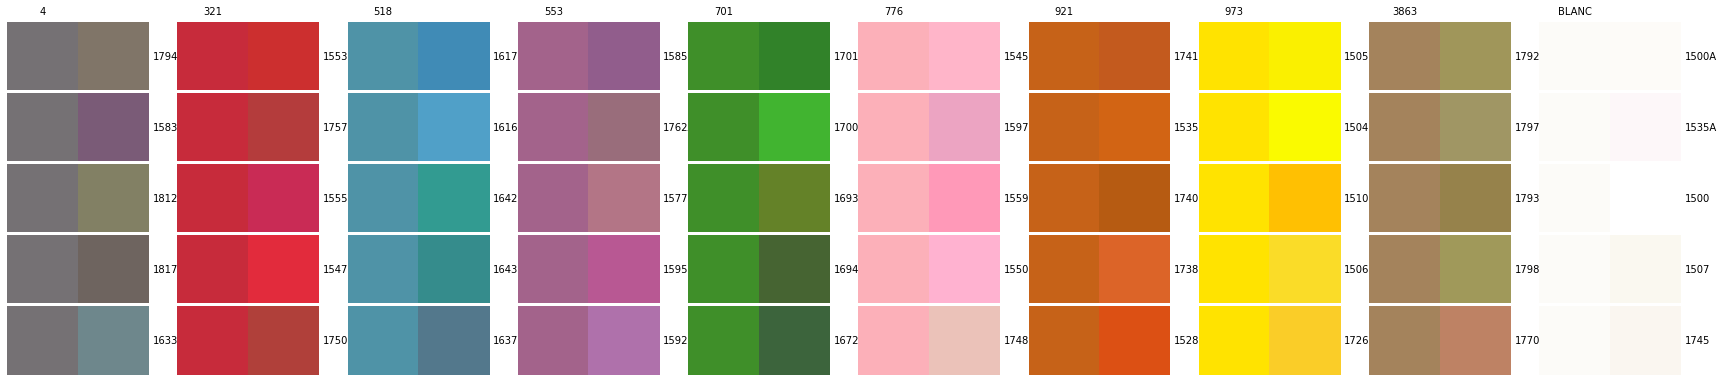

In [8]:
run(rgb_euclidean)

### RGB with gamma correction

${\begin{cases}{\sqrt {2\times \Delta R^{2}+4\times \Delta G^{2}+3\times \Delta B^{2}}}&{\bar {R}}<128,\\{\sqrt {3\times \Delta R^{2}+4\times \Delta G^{2}+2\times \Delta B^{2}}}&\text{otherwise}\end{cases}}$

${\begin{aligned}\Delta R&=R_{1}-R_{2}\\\Delta G&=G_{1}-G_{2}\\\Delta B&=B_{1}-B_{2}\\{\bar {R}}&={{R_{1}+R_{2}} \over 2}\\\end{aligned}}$

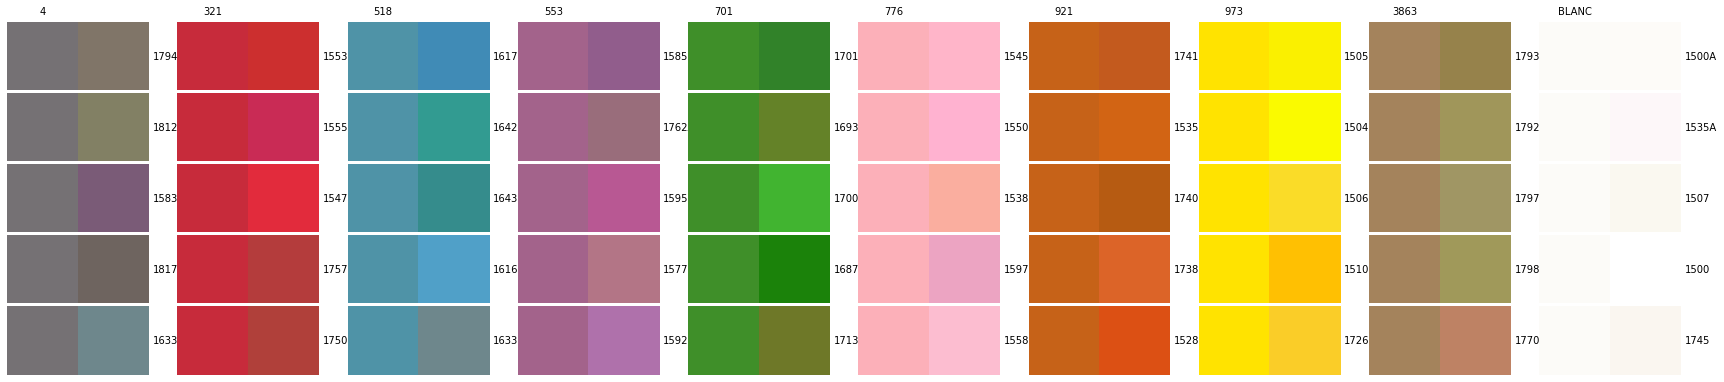

In [9]:
run(rgb_gamma_correction)

## XYZ

$\text{score}=\text{distance} ^{2}={(X_{2}-X_{1})^{2}+(Y_{2}-Y_{1})^{2}+(Z_{2}-Z_{1})^{2}}$

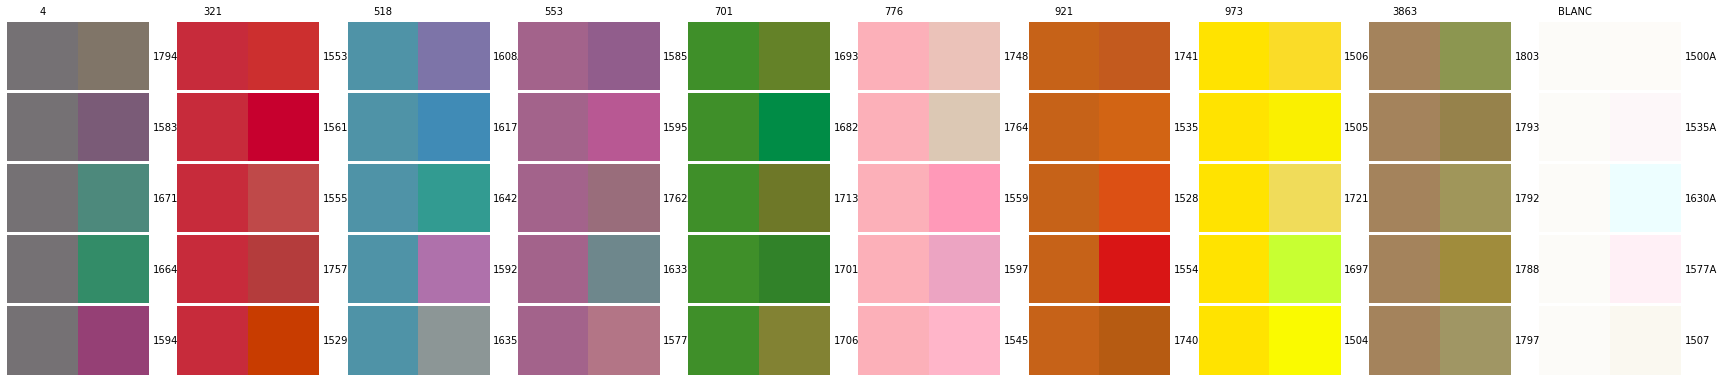

In [10]:
run(xyz_euclidean)

## CIELAB

 $\Delta E$ - (Delta E, dE) the measure of change in visual perception of two given colors

### CIE76

$\Delta E={\sqrt {(L_{2}-L_{1})^{2}+(a_{2}-a_{1})^{2}+(b_{2}-b_{1})^{2}}}$

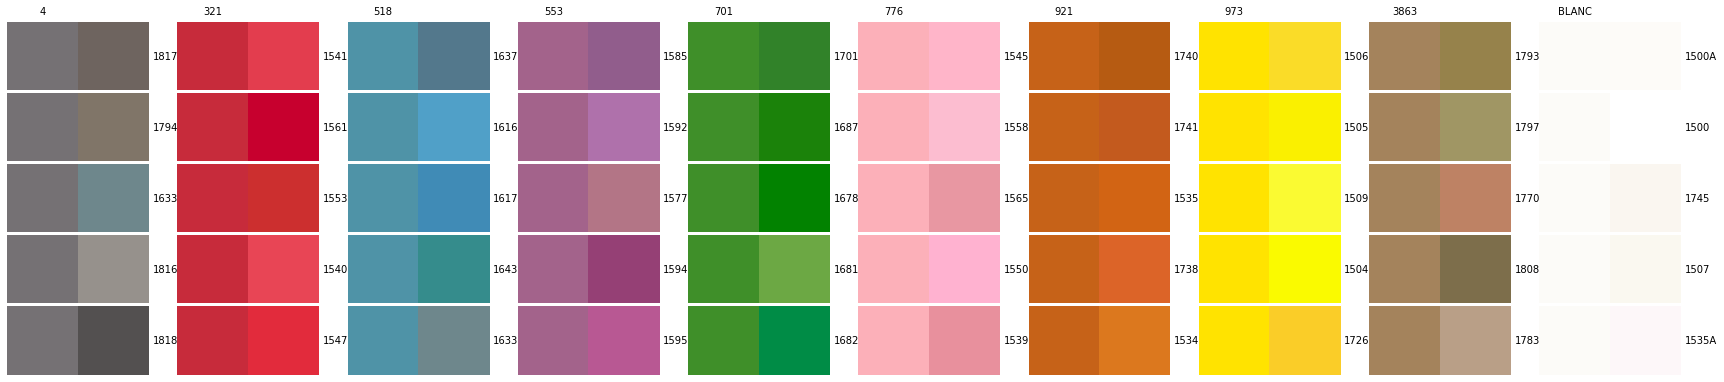

In [11]:
run(cie76)

### CIE94

$\Delta E={\sqrt {\left({\frac {\Delta L}{k_{L}S_{L}}}\right)^{2}+\left({\frac {\Delta C}{k_{C}S_{C}}}\right)^{2}+\left({\frac {\Delta H}{k_{H}S_{H}}}\right)^{2}}}$

$\begin{aligned}\Delta L&=L_{1}-L_{2}\\\Delta C&=C_{1}-C_{2} \quad C={\sqrt {{a}^{2}+{b}^{2}}}\\\Delta H&={\sqrt {{\Delta a}^{2}+{\Delta b}^{2}-{\Delta C}^{2}}}\\\end{aligned}$

${\begin{aligned}S_{L}&=1\\S_{C}&=1+K_{1}C_{1}\\S_{H}&=1+K_{2}C_{1}\\\end{aligned}}$

${k_{L}=k_{C}=k_{H}=1}$

${\begin{aligned}K_{1}&=0.045\\K_{2}&=0.015\\\end{aligned}}$

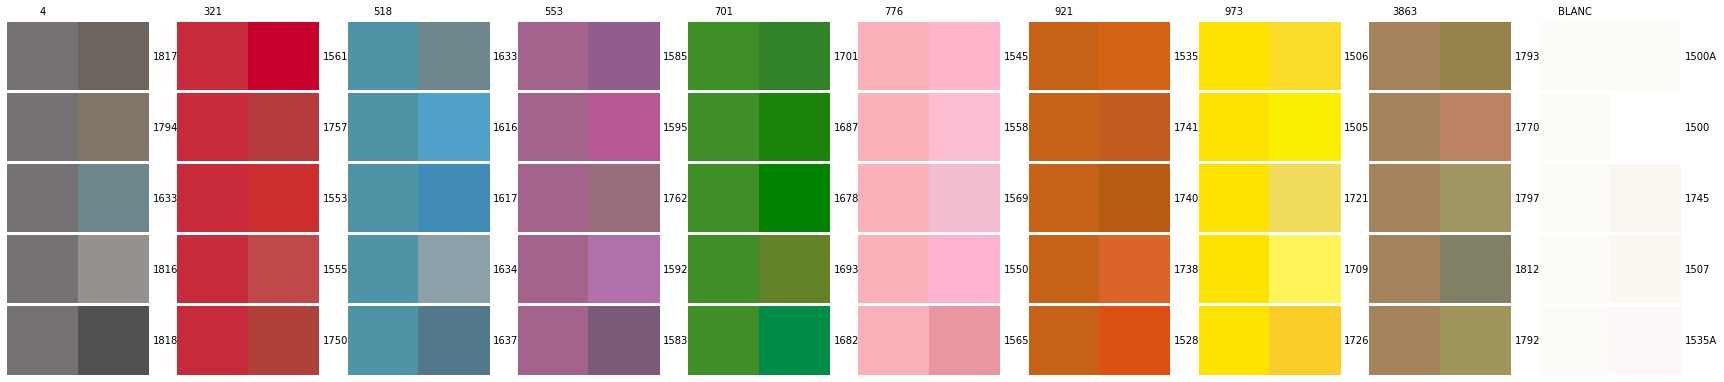

In [12]:
run(cie94)

### CIEDE2000

$\Delta E={\sqrt {\left({\frac {\Delta L'}{k_{L}S_{L}}}\right)^{2}+\left({\frac {\Delta C'}{k_{C}S_{C}}}\right)^{2}+\left({\frac {\Delta H'}{k_{H}S_{H}}}\right)^{2}+R_{T}{\frac {\Delta C'}{k_{C}S_{C}}}{\frac {\Delta H'}{k_{H}S_{H}}}}}$
___
${\displaystyle {\bar {L}}={\frac {L_{1}+L_{2}}{2}}}$

${\displaystyle \Delta L^{\prime }=L_{2}-L_{1}}$
___
${\displaystyle {\bar {C}}={\frac {C_{1}+C_{2}}{2}} \quad {\bar {C^\prime}}={\frac {C_{1}^\prime+C_{2}^\prime}{2}}}$

${\displaystyle \Delta C^{\prime }=C_{2}^\prime-C_{1}^\prime}$

$\begin{aligned}
C^{\prime}&=\sqrt {a^{\prime2}+b^2}\\
a^{\prime}&=a+\frac{a}{2}\left(1-\sqrt{\frac{\bar{C}^7}{\bar{C}^7+25^7}}\right)
\end{aligned}$
___

${\begin{aligned}h^\prime&={\begin{cases}{\arctan(b/a^\prime)}&{\text{if }}\arctan(b/a^\prime) \geq 0\\{\arctan(b/a^\prime) + 360^{\circ}}&{\text{otherwise}}\end{cases}}\end{aligned}}$

${\displaystyle \Delta h'={\begin{cases}h_{2}^{\prime }-h_{1}^{\prime }&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|\leq 180^{\circ }\\h_{2}^{\prime }-h_{1}^{\prime }+360^{\circ }&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|>180^{\circ },h_{2}^{\prime }\leq h_{1}^{\prime }\\h_{2}^{\prime }-h_{1}^{\prime }-360^{\circ }&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|>180^{\circ },h_{2}^{\prime }>h_{1}^{\prime }\end{cases}}}$

${\displaystyle \Delta H^{\prime }=2{\sqrt {C_{1}^{\prime }C_{2}^{\prime }}}\sin(\frac{\Delta h^{\prime }}{2}),\quad {\bar {H}}^{\prime }={\begin{cases}(h_{1}^{\prime }+h_{2}^{\prime })/2&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|\leq 180^{\circ }\\(h_{1}^{\prime }+h_{2}^{\prime }+360^{\circ })/2&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|>180^{\circ },h_{1}^{\prime }+h_{2}^{\prime }<360^{\circ }\\(h_{1}^{\prime }+h_{2}^{\prime }-360^{\circ })/2&\left|h_{1}^{\prime }-h_{2}^{\prime }\right|>180^{\circ },h_{1}^{\prime }+h_{2}^{\prime }\geq 360^{\circ }\end{cases}}}$
___
${\displaystyle T=1-0.17\cos({\bar {H}}^{\prime }-30)+0.24\cos(2{\bar {H}}^{\prime })+0.32\cos(3{\bar {H}}^{\prime }+6)-0.20\cos(4{\bar {H}}^{\prime }-63)}$

${\displaystyle \begin{aligned}S_{L}&=1+{\frac {0.015\left({\bar {L}}-50\right)^{2}}{\sqrt {20+{\left({\bar {L}}-50\right)}^{2}}}}\\S_{C}&=1+0.045{\bar {C}}^{\prime }\\S_{H}&=1+0.015{\bar {C}}^{\prime }T\\\end{aligned}}$

${\displaystyle R_{T}=-2{\sqrt {\frac {{\bar {C}}'^{7}}{{\bar {C}}'^{7}+25^{7}}}}\sin \left[60\cdot \exp \left(-\left[{\frac {{\bar {H}}'-275}{25}}\right]^{2}\right)\right]}$

${k_{L}=k_{C}=k_{H}=1}$

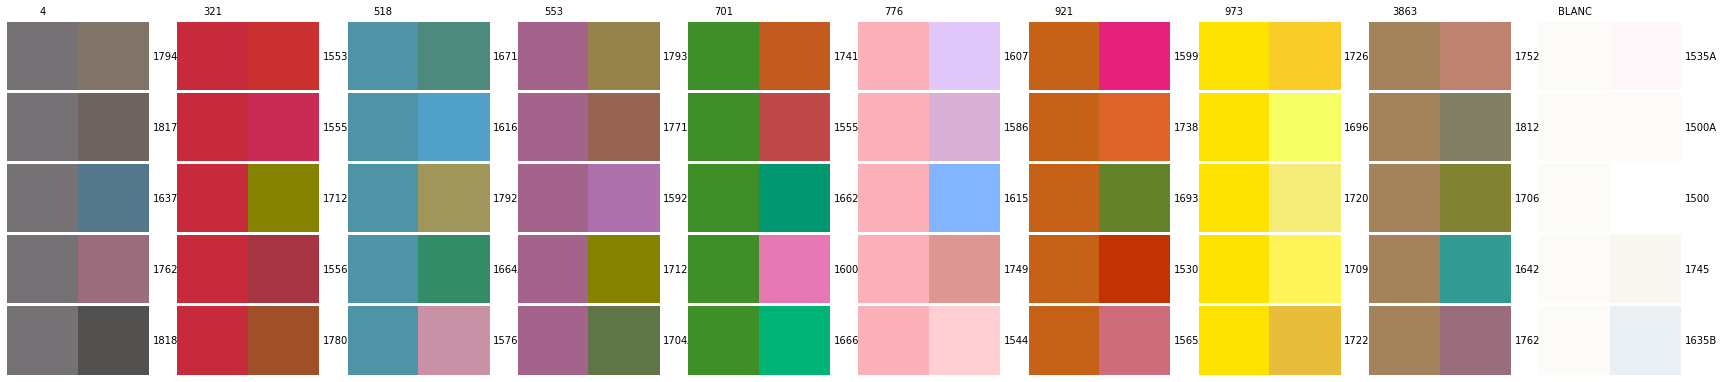

In [13]:
run(ciede2000)